In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [6]:
# Creating Sample Mesh Grid
X = np.array([1,2,3])
Y = np.array([4,5,6,7])

XX , YY = np.meshgrid(X,Y)
XX.shape

(4, 3)

In [7]:
x = np.linspace(-40,40,90)
y = np.linspace(-50,50,100)

XX , YY = np.meshgrid(x,y)



In [8]:
z = (XX**2) + (YY**2)

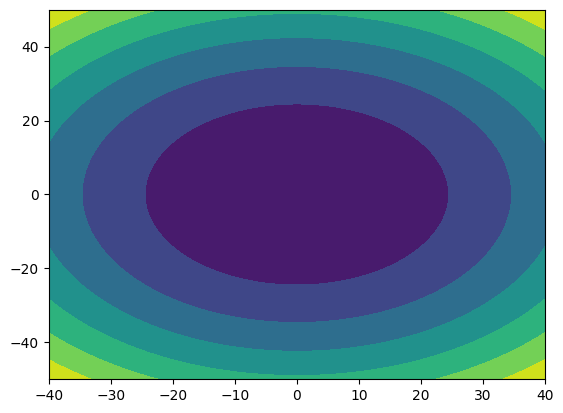

In [10]:
plt.contourf(XX,YY,z)
plt.show()

In [11]:
df = pd.read_csv("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [22]:
X = df.iloc[:,2:4].values
y = df.iloc[:,-1].values

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [32]:
import numpy as np
a = np.arange(start=X_train[:,0].min()-1, stop= X_train[:,0].max()+1, step=0.01 )
a.shape

(603,)

In [33]:
b = np.arange(start=X_train[:,1].min()-1, stop= X_train[:,1].max()+1, step=0.01 )
b.shape

(595,)

In [34]:
XX , YY = np.meshgrid(a,b)

In [35]:
XX.shape
YY.shape

(595, 603)

In [36]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [42]:
input_array = np.array([XX.ravel(),YY.ravel()]).T
labels = classifier.predict(input_array)

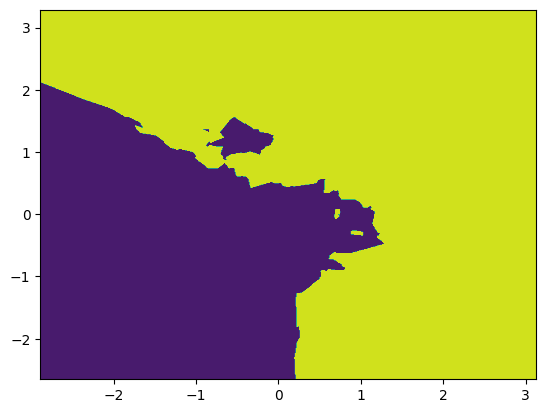

In [43]:
plt.contourf(XX,YY,labels.reshape(XX.shape))

<function matplotlib.pyplot.show(close=None, block=None)>

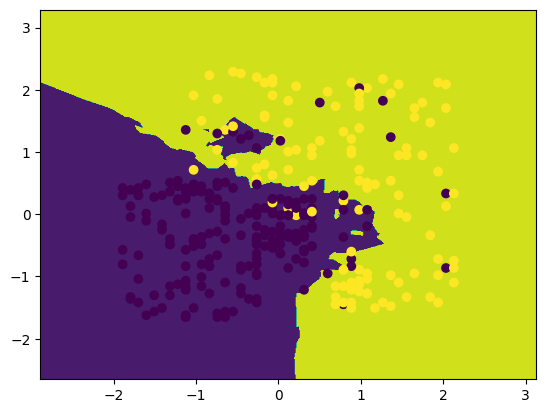

In [44]:
plt.contourf(XX,YY,labels.reshape(XX.shape))
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)
plt.show